In [13]:
import pandas as pd
import text2emotion as te
import wordninja
import re

root = "C:\\Users\\user\\SadafPythonCode\\MLHackathon\\ML-for-Good-Hackathon\\Data\\"
df = pd.read_csv(root + 'CrisisLogger\\crisislogger.csv')
df.head()

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...


In [20]:
#duplicated ids are joined in one transcription e.g. 436 and 441 are duplicate ids
df = df.groupby(['upload_id'])['transcriptions'].apply(' '.join).reset_index()
#df[df['upload_id']==466]['transcriptions']
a = df.iloc[38,1]


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")

def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    '''
    Preprocess a string.
    :parameter
        :param text: string - name of column containing text
        :param lst_stopwords: list - list of stopwords to remove
        :param flg_stemm: bool - whether stemming is to be applied
        :param flg_lemm: bool - whether lemmitisation is to be applied
    :return
        cleaned text
    '''

    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'re", " are", text)    
    text = text.replace('-', ' ')
    
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [23]:
from nltk.corpus import stopwords

def remove_stopwords(input_text): 
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]     
    return " ".join(clean_words) 

from collections import Counter 
def remove_duplicates(input_text):
 
    # split input string separated by space
    input_text = input_text.split(" ")
 
    # joins two adjacent elements in iterable way
    for i in range(0, len(input_text)):
        input_text[i] = "".join(input_text[i])
 
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input_text)
 
    # joins two adjacent elements in iterable way
    return " ".join(UniqW.keys())

def split_words(input_text):
    return " ".join(wordninja.split(input_text))

def removing_shortcuts(text):
    full_words = []
    shortcuts = {"I'm": 'I am', 
            "doesn't": 'does not',
            "he's": "he is",
            "can't": "cannot",
            "I've": "I have",
            "we've": "we have"}
    
    for word in text.split():
        if word in shortcuts.keys():
            word = shortcuts[word]        
        full_words.append(word)
 
    return " ".join(full_words)

def remove_place(input_text):
    return "".join(input_text.replace('new york', ''))

In [25]:
#df['new'] = df['transcriptions'].apply(remove_stopwords).apply(remove_duplicates).apply(removing_shortcuts)
df['new'] = df['transcriptions'].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df['new'] = df['new'].apply(remove_duplicates).apply(remove_place)
df['emotion'] = df.apply(lambda row: te.get_emotion(row.new), axis=1)
df = pd.concat([df.drop(['emotion'], axis=1), df['emotion'].apply(pd.Series)], axis=1)
df

,upload_id,transcriptions,new,Happy,Angry,Surprise,Sad,Fear
0,10,so high our experience so far has been a littl...,high experience far little bit difficult teena...,0.17,0.11,0.17,0.17,0.39
1,209,I'm not going to stay in my name for the anony...,going stay name anonymity mid forty remotely w...,0.15,0.08,0.06,0.21,0.50
2,216,so far I have been florentines now for about a...,far florentine month half tough seems mean pr...,0.15,0.04,0.27,0.19,0.35
3,222,it has actually been a very difficult. Trying ...,actually difficult trying get adjusted change ...,0.07,0.00,0.14,0.14,0.64
4,228,so this whole situation has been strange for u...,whole situation strange u feel lucky laid unem...,0.18,0.07,0.14,0.29,0.32
...,...,...,...,...,...,...,...,...
127,750,I am a parent of a 5th grader going into 6th g...,parent 5th grader going 6th grade son autism 7...,0.13,0.08,0.23,0.21,0.36
128,752,over 19 really impacted us because and it's no...,19 really impacted u shutdown school outdoor a...,0.12,0.15,0.24,0.12,0.36
129,754,so today is May 20th and has been over for abo...,today may 20th two month make knocked young ch...,0.06,0.13,0.23,0.19,0.39
130,756,hi my name is divyansh not trying and I live i...,hi name divyansh trying live city wanted shar...,0.08,0.08,0.38,0.21,0.25


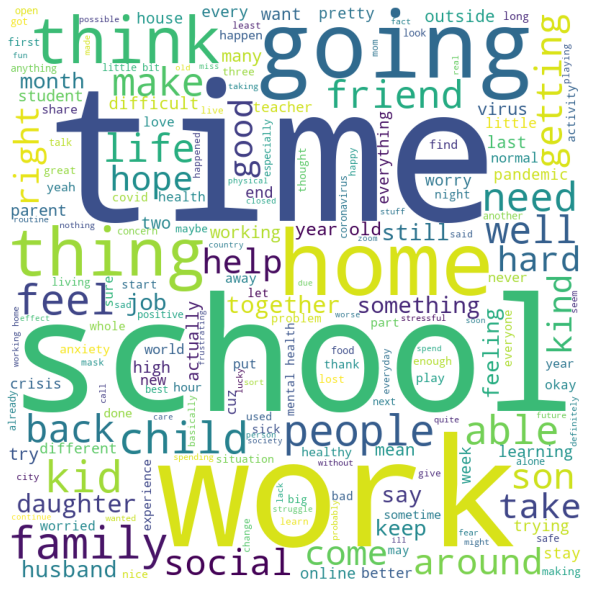

In [32]:
from wordcloud import WordCloud

corpus=''
for i in range(len(df)):
    corpus += "".join(df.iloc[i]['new'])

from collections import Counter
swords = ['know', 'like', 'get', 'one', 'much', 'also', 'even', 'u', 'lot', 'even', 'one', 'go', 'way', 'day', 'see', 'really']

word_list = corpus.split(' ')
resultwords = [word for word in word_list if word not in swords]
result = ' '.join(resultwords)

new_list = result.split(' ')
Counter = Counter(new_list)
most_occur = Counter.most_common(30)
most_occur

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(result)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [82]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model="all-mpnet-base-v2", 
                       n_gram_range=(2,3),                        
                       #top_n_words =5,
                       #min_topic_size=3,
                      )
docs = df['new']
topic_model.fit(docs)

In [83]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,59,-1_year old_feel like_16 year_16 year old
1,0,28,0_year old_working home_mother 13 year_health ...
2,1,26,1_helping get crisis_get crisis_helping get_ja...
3,2,19,2_covid 19_future hold_social emotional_covid ...


In [84]:
topic_model.get_topic(1)

[('helping get crisis', 0.004058535186290544),
 ('get crisis', 0.004058535186290544),
 ('helping get', 0.003932979664380734),
 ('jamaica queen', 0.00316530330522717),
 ('frustration need', 0.00316530330522717),
 ('fear frustration need', 0.00316530330522717),
 ('working home', 0.0026170055203923433),
 ('mental health', 0.002486120053391145),
 ('coronavirus crisis', 0.0022242731299464947),
 ('health counselor counseling', 0.0022242731299464947)]

In [85]:
topic_model.visualize_topics()

In [86]:
topic_model.visualize_barchart()

In [ ]:
import re
import pandas as pd

# Prepare data
trump = pd.read_csv('https://drive.google.com/uc?export=download&id=1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6')
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [ ]:
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

In [ ]:
topic_model.get_topic(0)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, topics, timestamps)

In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, topics, timestamps, nr_bins=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)